<a href="https://colab.research.google.com/github/anggithaycs/klastering-titik-api/blob/master/Preparation_%26_KMeans_180k_rows.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler 
from sklearn.decomposition import PCA
from sklearn import metrics

In [0]:
df = pd.read_csv("drive/My Drive/Damin/fire_archive_raw.csv")

#Preprocessing

1.   Removing unnecessary columns
2.   Data Scaling using MinMax Scaler

In [0]:
df.head()

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,type
0,-2.78686,120.37390,325.5,0.57,0.52,2018-01-01,455,N,VIIRS,n,1,290.7,4.7,0
1,-0.82440,127.86865,332.6,0.39,0.36,2018-01-01,455,N,VIIRS,n,1,292.5,3.7,3
2,-1.43265,132.32120,333.3,0.57,0.43,2018-01-01,455,N,VIIRS,n,1,290.1,5.5,0
3,0.90354,127.62830,337.7,0.39,0.36,2018-01-01,456,N,VIIRS,n,1,296.4,8.2,0
4,-0.86484,122.20721,329.5,0.40,0.44,2018-01-01,456,N,VIIRS,n,1,287.4,2.2,0


In [0]:
df.drop(df.columns[df.columns.str.contains('scan',case = False)],axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('track',case = False)],axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('acq_date',case = False)],axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('acq_time',case = False)],axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('satellite',case = False)],axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('instrument',case = False)],axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('version',case = False)],axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('type',case = False)],axis = 1, inplace = True)
df.drop(df.columns[df.columns.str.contains('confidence',case = False)],axis = 1, inplace = True)

In [0]:
df.to_csv("drive/My Drive/Damin/fire_archive.csv", index=False)
#Fire archive file yang ini menyisakan 5 cols.

In [0]:
df = df.sample(n=25000)

In [0]:
df.to_csv("drive/My Drive/Damin/25k_fire_archive.csv", index=False)

In [0]:
mms = MinMaxScaler()
df_scale= mms.fit_transform(df)
df_scale = pd.DataFrame(df_scale,columns=df.columns)

In [0]:
df_scale.to_csv("drive/My Drive/Damin/scaled_fire_archive.csv", index=False)
#File hasil scaling

In [0]:
df_scale.head()

,latitude,longitude,bright_ti4,bright_ti5,frp
0,0.681121,0.323906,0.857862,0.325088,0.039637
1,0.148828,0.628303,0.845912,0.425795,0.007307
2,0.223752,0.249071,0.784277,0.449647,0.004429
3,0.160628,0.781454,0.881132,0.424028,0.013286
4,0.141966,0.516287,0.909434,0.450530,0.029894


In [0]:
df = df_scale

#K-Means Clustering
> Perform the K-Means Clustering using 6 attributes for k = 2, 3, 4, 5, 6

## Cluster = 2


In [0]:
df_2c = pd.DataFrame(df_scale)

In [0]:
clustering_kmeans = KMeans(n_clusters=2)
df_2c['cluster'] = clustering_kmeans.fit_predict(df_2c)

In [0]:
cluster_df_2c = df_2c['cluster']

In [0]:
df_2c.loc[df_2c['cluster'] == 0, 'color'] = 'r'
df_2c.loc[df_2c['cluster'] == 1, 'color'] = 'g'

In [0]:
df_2c.head()

,latitude,longitude,bright_ti4,bright_ti5,frp,cluster,color
0,0.681121,0.323906,0.857862,0.325088,0.039637,1,g
1,0.148828,0.628303,0.845912,0.425795,0.007307,0,r
2,0.223752,0.249071,0.784277,0.449647,0.004429,1,g
3,0.160628,0.781454,0.881132,0.424028,0.013286,0,r
4,0.141966,0.516287,0.909434,0.450530,0.029894,0,r


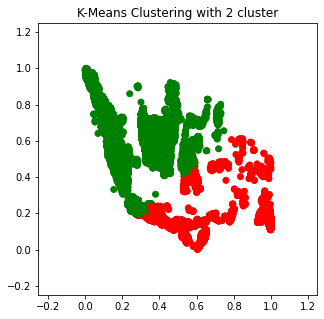

In [0]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_2c['longitude'], df_2c['latitude'], color =df_2c['color'])
plt.title('K-Means Clustering with 2 cluster')
plt.xlim(-0.25,1.25) 
plt.ylim(-0.25,1.25)
plt.show()

In [0]:
df_2c['cluster'].value_counts()

1    15550
0     9450
Name: cluster, dtype: int64

In [0]:
df_2c.drop(df_2c.columns[df_2c.columns.str.contains('color',case = False)],axis = 1, inplace = True)

In [0]:
silhouette_avg = metrics.silhouette_score(df_2c, cluster_df_2c)
print ('silhouette coefficient for the clustering above = ', silhouette_avg)

silhouette coefficient for the clustering above =  0.7286688726144976


##Cluster = 3

In [0]:
df_scaled = pd.read_csv("drive/My Drive/Damin/scaled_fire_archive.csv")

In [0]:
df_3c = df_scaled

clustering_kmeans = KMeans(n_clusters=3)
df_3c['cluster'] = clustering_kmeans.fit_predict(df_3c)

df_3c.loc[df_3c['cluster'] == 0, 'color'] = 'r'
df_3c.loc[df_3c['cluster'] == 1, 'color'] = 'g'
df_3c.loc[df_3c['cluster'] == 2, 'color'] = 'b'

In [0]:
df_3c.head()

,latitude,longitude,bright_ti4,bright_ti5,frp,cluster,color
0,0.681121,0.323906,0.857862,0.325088,0.039637,2,b
1,0.148828,0.628303,0.845912,0.425795,0.007307,0,r
2,0.223752,0.249071,0.784277,0.449647,0.004429,0,r
3,0.160628,0.781454,0.881132,0.424028,0.013286,1,g
4,0.141966,0.516287,0.909434,0.450530,0.029894,0,r


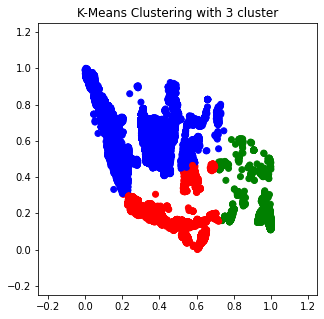

In [0]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_3c['longitude'], df_3c['latitude'], color =df_3c['color'])
plt.title('K-Means Clustering with 3 cluster')
plt.xlim(-0.25,1.25) 
plt.ylim(-0.25,1.25)
plt.show()

In [0]:
df_3c.drop(df_3c.columns[df_3c.columns.str.contains('color',case = False)],axis = 1, inplace = True)

In [0]:
silhouette_avg = metrics.silhouette_score(df_3c, df_3c['cluster'])
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.7760020645861937


##Cluster = 4

In [0]:
df_scaled = pd.read_csv("drive/My Drive/Damin/scaled_fire_archive.csv")

In [0]:
df_4c = df_scaled

clustering_kmeans = KMeans(n_clusters=4)
df_4c['cluster'] = clustering_kmeans.fit_predict(df_4c)

df_4c.loc[df_4c['cluster'] == 0, 'color'] = 'r'
df_4c.loc[df_4c['cluster'] == 1, 'color'] = 'g'
df_4c.loc[df_4c['cluster'] == 2, 'color'] = 'b'
df_4c.loc[df_4c['cluster'] == 3, 'color'] = 'y'

In [0]:
df_4c.head()

,latitude,longitude,bright_ti4,bright_ti5,frp,cluster,color
0,0.681121,0.323906,0.857862,0.325088,0.039637,1,g
1,0.148828,0.628303,0.845912,0.425795,0.007307,3,y
2,0.223752,0.249071,0.784277,0.449647,0.004429,3,y
3,0.160628,0.781454,0.881132,0.424028,0.013286,2,b
4,0.141966,0.516287,0.909434,0.450530,0.029894,3,y


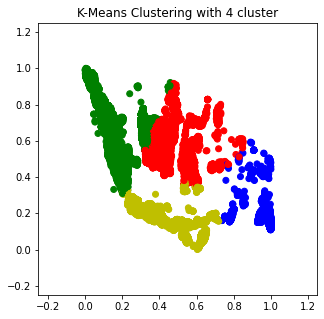

In [0]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_4c['longitude'], df_4c['latitude'], color =df_4c['color'])
plt.title('K-Means Clustering with 4 cluster')
plt.xlim(-0.25,1.25) 
plt.ylim(-0.25,1.25)
plt.show()

In [0]:
df_4c.drop(df_4c.columns[df_4c.columns.str.contains('color',case = False)],axis = 1, inplace = True)

In [0]:
silhouette_avg = metrics.silhouette_score(df_4c, df_4c['cluster'])
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.7770490732185806


##Cluster = 5

In [0]:
df_scaled = pd.read_csv("drive/My Drive/Damin/scaled_fire_archive.csv")

In [0]:
df_5c = df_scaled

clustering_kmeans = KMeans(n_clusters=5)
df_5c['cluster'] = clustering_kmeans.fit_predict(df_5c)

df_5c.loc[df_5c['cluster'] == 0, 'color'] = 'r'
df_5c.loc[df_5c['cluster'] == 1, 'color'] = 'g'
df_5c.loc[df_5c['cluster'] == 2, 'color'] = 'b'
df_5c.loc[df_5c['cluster'] == 3, 'color'] = 'y'
df_5c.loc[df_5c['cluster'] == 4, 'color'] = 'c'

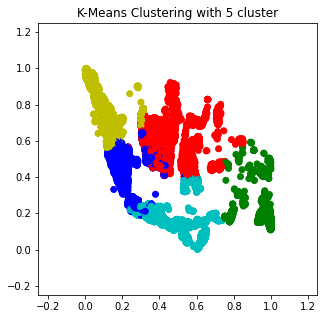

In [0]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_5c['longitude'], df_5c['latitude'], color =df_5c['color'])
plt.title('K-Means Clustering with 5 cluster')
plt.xlim(-0.25,1.25) 
plt.ylim(-0.25,1.25)
plt.show()

In [0]:
df_5c.drop(df_5c.columns[df_5c.columns.str.contains('color',case = False)],axis = 1, inplace = True)

In [0]:
silhouette_avg = metrics.silhouette_score(df_5c, df_5c['cluster'])
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.8065306424304634


##Cluster = 6

In [0]:
df_scaled = pd.read_csv("drive/My Drive/Damin/scaled_fire_archive.csv")

In [0]:
df_6c = df_scaled

clustering_kmeans = KMeans(n_clusters=6)
df_6c['cluster'] = clustering_kmeans.fit_predict(df_6c)

df_6c.loc[df_6c['cluster'] == 0, 'color'] = 'r'
df_6c.loc[df_6c['cluster'] == 1, 'color'] = 'g'
df_6c.loc[df_6c['cluster'] == 2, 'color'] = 'b'
df_6c.loc[df_6c['cluster'] == 3, 'color'] = 'y'
df_6c.loc[df_6c['cluster'] == 4, 'color'] = 'c'
df_6c.loc[df_6c['cluster'] == 5, 'color'] = 'm'

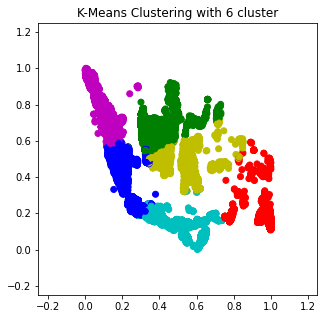

In [0]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df_6c['longitude'], df_6c['latitude'], color =df_6c['color'])
plt.title('K-Means Clustering with 6 cluster')
plt.xlim(-0.25,1.25) 
plt.ylim(-0.25,1.25)
plt.show()

In [0]:
df_6c.drop(df_6c.columns[df_6c.columns.str.contains('color',case = False)],axis = 1, inplace = True)

In [0]:
silhouette_avg = metrics.silhouette_score(df_6c, df_6c['cluster'])
print ('silhouette coefficient for the above clutering = ', silhouette_avg)

silhouette coefficient for the above clutering =  0.8101438649953462


##Comparison of each clustering's values

In [0]:
df_2c['cluster'].value_counts()

1    15550
0     9450
Name: cluster, dtype: int64

In [0]:
df_3c['cluster'].value_counts()

2    14752
0     6637
1     3611
Name: cluster, dtype: int64

In [0]:
df_4c['cluster'].value_counts()

0    7853
1    7686
3    5912
2    3549
Name: cluster, dtype: int64

In [0]:
df_5c['cluster'].value_counts()

0    8461
4    5587
2    4410
1    3557
3    2985
Name: cluster, dtype: int64

In [0]:
df_6c['cluster'].value_counts()

1    5867
3    4999
4    4998
0    3535
2    2986
5    2615
Name: cluster, dtype: int64